In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from tabulate import tabulate

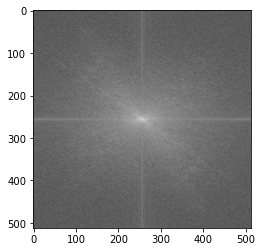

In [13]:
# Load the image
img = cv2.imread('lenna.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform 2D Fourier Transform
f = np.fft.fft2(gray)

# Shift zero-frequency component to center
fshift = np.fft.fftshift(f)
abs_ff = abs(fshift)
phase = np.angle(fshift)

# Compute magnitude spectrum
magnitude_spectrum = 20*np.log(1+np.abs(fshift))

# Display the Fourier domain image
plt.figure()
plt.imshow(magnitude_spectrum , cmap='gray')
plt.show()


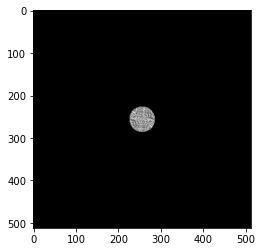

In [18]:
# Design a low-pass filter with a radius of 30
rows, cols = gray.shape
crow, ccol = rows//2, cols//2
r = 30

# Create a binary mask based on the distance from the center
mask = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if (i - crow)**2 + (j - ccol)**2 <= r**2:
            mask[i, j] = 1
            

# Apply the filter to the filterd spectrum
filtered_spectrum = abs_ff * mask
filtered_spectrum = filtered_spectrum * np.exp(1j*phase)


# Apply the filter to the normalized magnitude spectrum
show_spectrum = magnitude_spectrum * mask

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()

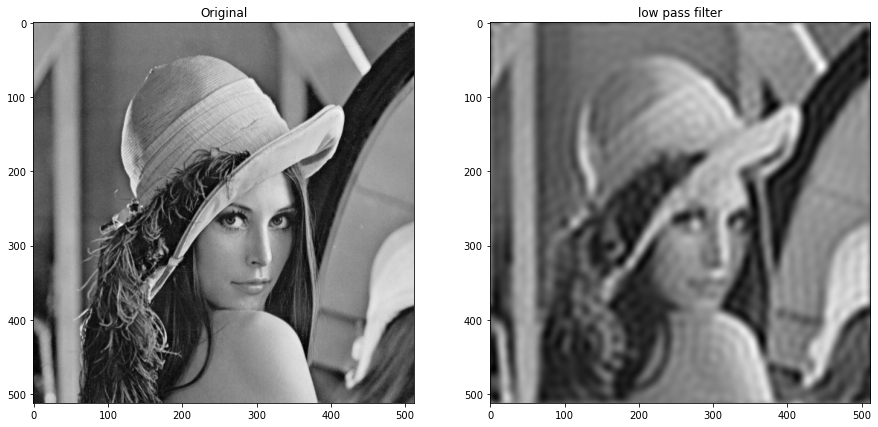

In [22]:

# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = ifftshift(filtered_spectrum)

# Apply inverse 2D Fourier Transform
img_back = ifft2(f_ishift)

# Take the absolute value to get rid of any complex numbers
img_back = np.abs(img_back)


# Convert to 8-bit integer
img_back = img_back.astype('uint8')

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title('low pass filter')
plt.show()

In [ ]:
# Load the image
img = cv2.imread('lenna.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform 2D Fourier Transform
f = np.fft.fft2(gray)

# Shift zero-frequency component to center
fshift = np.fft.fftshift(f)
abs_ff = abs(fshift)
phase = np.angle(fshift)

# Compute magnitude spectrum
magnitude_spectrum = 20*np.log(1+np.abs(fshift))

# Display the Fourier domain image
plt.figure()
plt.imshow(magnitude_spectrum , cmap='gray')
plt.show()

# Design a low-pass filter with a radius of 30
rows, cols = gray.shape
crow, ccol = rows//2, cols//2
r = 30

# Create a binary mask based on the distance from the center
mask = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if (i - crow)**2 + (j - ccol)**2 <= r**2:
            mask[i, j] = 1
            

# Apply the filter to the filterd spectrum
filtered_spectrum = abs_ff * mask
filtered_spectrum = filtered_spectrum * np.exp(1j*phase)


# Apply the filter to the normalized magnitude spectrum
show_spectrum = magnitude_spectrum * mask

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()


# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = np.fft.ifftshift(np.fft.ifft2(filtered_spectrum))

# Take the absolute value to get rid of any complex numbers
img_back = img_back

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title('low pass filter')
plt.show()


In [ ]:
# Load the image
img = cv2.imread('lenna.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform 2D Fourier Transform
f = np.fft.fft2(gray)

# Shift zero-frequency component to center
fshift = np.fft.fftshift(f)
abs_ff = abs(fshift)
phase = np.angle(fshift)

# Compute magnitude spectrum
magnitude_spectrum = 20*np.log(1+np.abs(fshift))

# Display the Fourier domain image
plt.figure()
plt.imshow(magnitude_spectrum , cmap='gray')
plt.show()








# Design a Gaussian low-pass filter with a radius of 30
rows, cols = gray.shape
crow, ccol = rows//2, cols//2
r = 30

# Create a binary mask based on the distance from the center
mask = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i-crow)**2 + (j-ccol)**2) <= r:
            mask[i,j] = 1

# Convert the binary mask to a Gaussian mask using distance
std = r/np.sqrt(2*np.log(2))
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
dist = np.sqrt((x - ccol)**2 + (y - crow)**2)
gaussian_mask = np.exp(-dist**2/(2*std**2))

# Normalize the Gaussian mask
gaussian_mask = gaussian_mask/np.sum(gaussian_mask)

# Apply the filter to the filtered spectrum using the mask
filtered_spectrum = fshift * mask * gaussian_mask

# Apply the filter to the normalized magnitude spectrum using the mask
show_spectrum = magnitude_spectrum * mask * gaussian_mask


# Apply the filter to the normalized magnitude spectrum
# show_spectrum = magnitude_spectrum * gaussian_mask

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()




# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = np.fft.ifftshift(np.fft.ifft2(filtered_spectrum))

# Take the absolute value to get rid of any complex numbers
img_back = abs(img_back)

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title('guassian low pass filter')
plt.show()


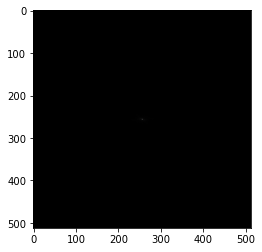

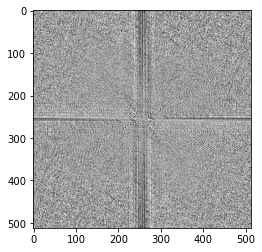

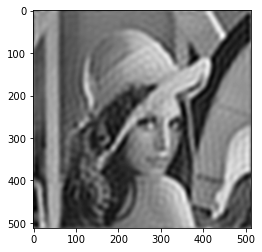

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [25]:
import cv2
import numpy as np
from scipy.fft import fft2, fftshift, ifft2, ifftshift
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('lenna.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform 2D Fourier Transform
f = fft2(gray)

# Shift zero-frequency component to center
fshift = fftshift(f)
abs_ff = abs(fshift)
phase = np.angle(fshift)

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(1 + np.abs(phase))

# Normalize the magnitude spectrum to a range of 0-255
# normalized_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the Fourier domain image
plt.figure()
plt.imshow(abs_ff, cmap='gray')
plt.show()
plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

# Design a low-pass filter with a radius of 30
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
r = 30

# Create a binary mask based on the distance from the center
mask = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if (i - crow) ** 2 + (j - ccol) ** 2 <= r ** 2:
            mask[i, j] = 1

# Apply the filter to the magnitude spectrum
filtered_spectrum = abs_ff * mask

filtered_spectrum = filtered_spectrum * np.exp(1j * phase)

# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = ifftshift(filtered_spectrum)

# Apply inverse 2D Fourier Transform
img_back = ifft2(f_ishift)

# Take the absolute value to get rid of any complex numbers
img_back = np.abs(img_back)

# Normalize pixel values between 0 and 255
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

# Display the reconstructed image
plt.figure()
plt.imshow(img_back, cmap='gray')
plt.show()
print(np.unique(img_back))
